<a href="https://colab.research.google.com/github/bilalProgTech/btech-nmims/blob/master/NN-DL/Lab-Work/20230806-Lab-3-BTech-NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

 93% 225M/242M [00:01<00:00, 118MB/s]
100% 242M/242M [00:01<00:00, 136MB/s]


In [ ]:
!unzip *.zip

# CNN - Augmentation and Model

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [6]:
import os
image_path_list = []
for dirname, _, filenames in os.walk('/content/flower_images'):
    for filename in filenames:
        image_path_list.append(os.path.join(dirname, filename))

In [7]:
train_df = pd.DataFrame({'filename': image_path_list})
train_df['class'] = train_df['filename'].str.split('/').str[-2]
train_df.head()

filename  class
0  /content/flower_images/Lotus/c8e4698aa0.jpg  Lotus
1  /content/flower_images/Lotus/f50244bb4c.jpg  Lotus
2  /content/flower_images/Lotus/4e47a2a9b7.jpg  Lotus
3  /content/flower_images/Lotus/46c6cee4d0.jpg  Lotus
4  /content/flower_images/Lotus/fd59d80757.jpg  Lotus

In [8]:
train_df.shape

(5000, 2)

In [9]:
train_df['class'].value_counts()

Lotus        1000
Tulip        1000
Orchid       1000
Lilly        1000
Sunflower    1000
Name: class, dtype: int64

In [10]:
unique_feature = train_df['class'].unique()
len(unique_feature)

5

In [11]:
sample = train_df.sample(16)
files = sample['filename'].tolist()
targets = sample['class'].tolist()

In [12]:
files

['/content/flower_images/Lilly/c9b167647f.jpg',
 '/content/flower_images/Tulip/97089a15cb.jpg',
 '/content/flower_images/Lilly/5117f2a7de.jpg',
 '/content/flower_images/Lilly/358c237692.jpg',
 '/content/flower_images/Orchid/4eee6c4925.jpg',
 '/content/flower_images/Lotus/f96bec2961.jpg',
 '/content/flower_images/Orchid/34fc2aa741.jpg',
 '/content/flower_images/Lilly/bed177dd64.jpg',
 '/content/flower_images/Lilly/071a1b2099.jpg',
 '/content/flower_images/Lotus/d3b0198de3.jpg',
 '/content/flower_images/Sunflower/6e193b46e7.jpg',
 '/content/flower_images/Sunflower/82931c1c99.jpg',
 '/content/flower_images/Orchid/913c4fe0ec.jpg',
 '/content/flower_images/Sunflower/cd33cd2653.jpg',
 '/content/flower_images/Lilly/966d4a5772.jpg',
 '/content/flower_images/Orchid/2dc7fb09c2.jpg']

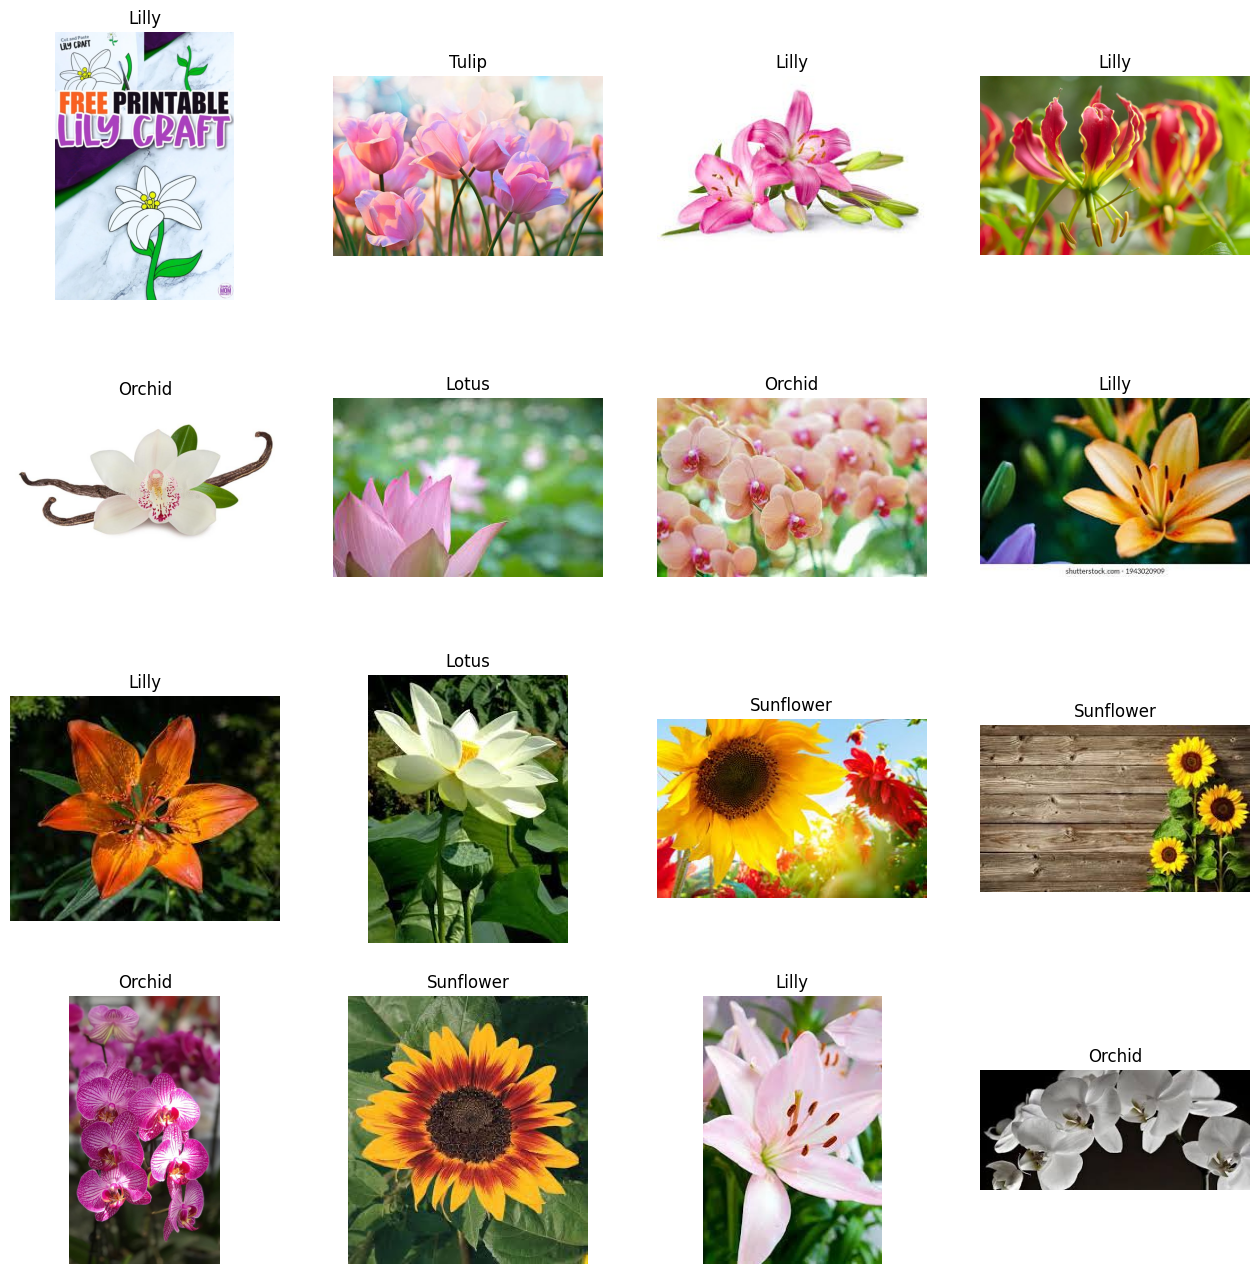

In [13]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, (img_path, target) in enumerate(zip(files, targets)):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(target)

plt.show()

In [16]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    target_size=(256, 256),
    class_mode='categorical')

Found 5000 validated image filenames belonging to 5 classes.


In [17]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),
                             tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(len(unique_feature), activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 16)                9

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_generator, epochs=10)

Epoch 1/10
157/157 [==============================] - 30s 122ms/step - loss: 1.2355 - accuracy: 0.5038
Epoch 2/10
157/157 [==============================] - 20s 129ms/step - loss: 0.8479 - accuracy: 0.6850
Epoch 3/10
157/157 [==============================] - 19s 123ms/step - loss: 0.5044 - accuracy: 0.8222
Epoch 4/10
157/157 [==============================] - 20s 125ms/step - loss: 0.2809 - accuracy: 0.9116
Epoch 5/10
157/157 [==============================] - 19s 119ms/step - loss: 0.1616 - accuracy: 0.9508
Epoch 6/10
157/157 [==============================] - 21s 130ms/step - loss: 0.0971 - accuracy: 0.9714
Epoch 7/10
157/157 [==============================] - 19s 120ms/step - loss: 0.0916 - accuracy: 0.9754
Epoch 8/10
157/157 [==============================] - 20s 125ms/step - loss: 0.0701 - accuracy: 0.9836
Epoch 9/10
157/157 [==============================] - 19s 123ms/step - loss: 0.0525 - accuracy: 0.9886
Epoch 10/10
157/157 [==============================] - 19s 124ms/step - l

In [20]:
model.evaluate(train_generator)

157/157 [==============================] - 20s 123ms/step - loss: 0.0415 - accuracy: 0.9928


[0.04150032997131348, 0.9927999973297119]

Lotus
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 67ms/step
(1, 254, 254, 32)
(1, 127, 127, 32)
(1, 125, 125, 16)
(1, 62, 62, 16)


<ipython-input-22-81737bf34e7d>:22: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


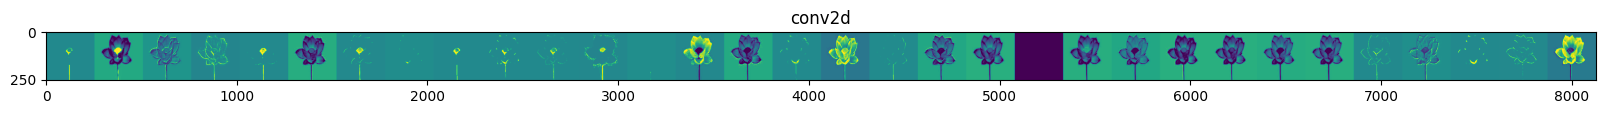

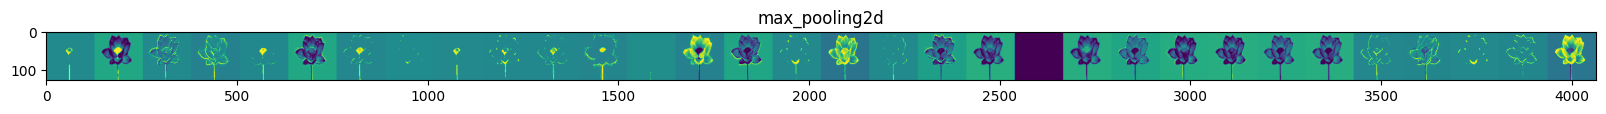

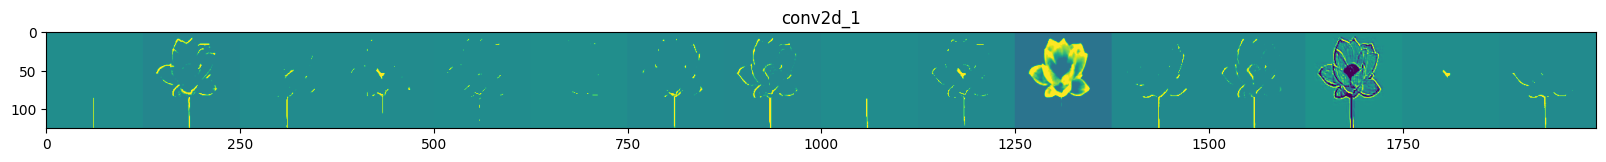

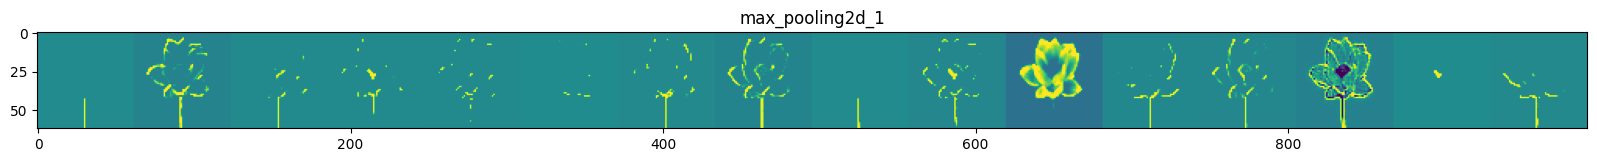

In [22]:
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = tf.keras.preprocessing.image.load_img(files[5], target_size=(256, 256))
x = tf.keras.preprocessing.image.img_to_array(img)
print(targets[5])
print(x.shape)
x = x.reshape((1,) + x.shape)
print(x.shape)
x /= 255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        print(feature_map.shape)
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [23]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                          rotation_range=40,
                                                          width_shift_range=0.4,
                                                          height_shift_range=0.4,
                                                          shear_range=0.2,
                                                          zoom_range=0.2,
                                                          horizontal_flip=True,
                                                          validation_split=0.2)


train_generator = datagen.flow_from_directory(
    '/content/flower_images',
    class_mode = 'categorical',
    target_size=(256,256),
    subset = 'training')

val_generator = datagen.flow_from_directory(
    '/content/flower_images',
    class_mode = 'categorical',
    target_size=(256,256),
    subset = 'validation')

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
125/125 [==============================] - 93s 745ms/step - loss: 1.4124 - accuracy: 0.4520 - val_loss: 1.2591 - val_accuracy: 0.4790
Epoch 2/10
125/125 [==============================] - 92s 734ms/step - loss: 1.2789 - accuracy: 0.4882 - val_loss: 1.2066 - val_accuracy: 0.5030
Epoch 3/10
125/125 [==============================] - 91s 733ms/step - loss: 1.2079 - accuracy: 0.5297 - val_loss: 1.2025 - val_accuracy: 0.5010
Epoch 4/10
125/125 [==============================] - 87s 700ms/step - loss: 1.1629 - accuracy: 0.5353 - val_loss: 1.1416 - val_accuracy: 0.5530
Epoch 5/10
125/125 [==============================] - 86s 685ms/step - loss: 1.1402 - accuracy: 0.5495 - val_loss: 1.1250 - val_accuracy: 0.5490
Epoch 6/10
125/125 [==============================] - 86s 683ms/step - loss: 1.0910 - accuracy: 0.5650 - val_loss: 1.0520 - val_accuracy: 0.5610
Epoch 7/10
125/125 [==============================] - 86s 688ms/step - loss: 1.0818 - accuracy: 0.5798 - val_loss: 1.0658 - val_ac

# Auto Encoder - Image Compression

In [16]:
tf.keras.backend.clear_session()

In [18]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/flower_images',
    target_size=(256, 256),
    color_mode='rgb',
    shuffle=True,
    seed=42,
    class_mode='input')

Found 5000 images belonging to 5 classes.


In [23]:
tf.keras.backend.clear_session()
class AutoEncoder(tf.keras.models.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),
            tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D((2, 2)),

            tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D((2, 2)),

            # Latent View Representation
            tf.keras.layers.Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu'),
        ])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(64, 64, 8)),
            tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
            tf.keras.layers.UpSampling2D((2, 2)),
            tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
            tf.keras.layers.UpSampling2D((2, 2)),

            tf.keras.layers.Conv2D(3, kernel_size=(3, 3), padding='same', activation='sigmoid'),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AutoEncoder()

In [34]:
tf.keras.backend.clear_session()
class AutoEncoder(tf.keras.models.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),
            tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
            tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
            # Latent View Representation
            tf.keras.layers.Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu'),
        ])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(256, 256, 8)),
            tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
            tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),

            tf.keras.layers.Conv2D(3, kernel_size=(3, 3), padding='same', activation='sigmoid'),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AutoEncoder()

In [35]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 8)       1160      
                                                                 
Total params: 6,680
Trainable params: 6,680
Non-trainable params: 0
_________________________________________________________________


In [36]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      1168      
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 3)       867       
                                                                 
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


In [37]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [38]:
%%time
history = autoencoder.fit(train_generator, epochs=10)

Epoch 1/10
157/157 [==============================] - 37s 198ms/step - loss: 0.4591
Epoch 2/10
157/157 [==============================] - 34s 215ms/step - loss: 0.4078
Epoch 3/10
157/157 [==============================] - 31s 195ms/step - loss: 0.4028
Epoch 4/10
157/157 [==============================] - 31s 197ms/step - loss: 0.4013
Epoch 5/10
157/157 [==============================] - 31s 196ms/step - loss: 0.3998
Epoch 6/10
157/157 [==============================] - 33s 209ms/step - loss: 0.3984
Epoch 7/10
157/157 [==============================] - 31s 195ms/step - loss: 0.3976
Epoch 8/10
157/157 [==============================] - 31s 197ms/step - loss: 0.3977
Epoch 9/10
157/157 [==============================] - 32s 200ms/step - loss: 0.3973
Epoch 10/10
157/157 [==============================] - 32s 200ms/step - loss: 0.3974
CPU times: user 7min 16s, sys: 12.8 s, total: 7min 29s
Wall time: 5min 43s


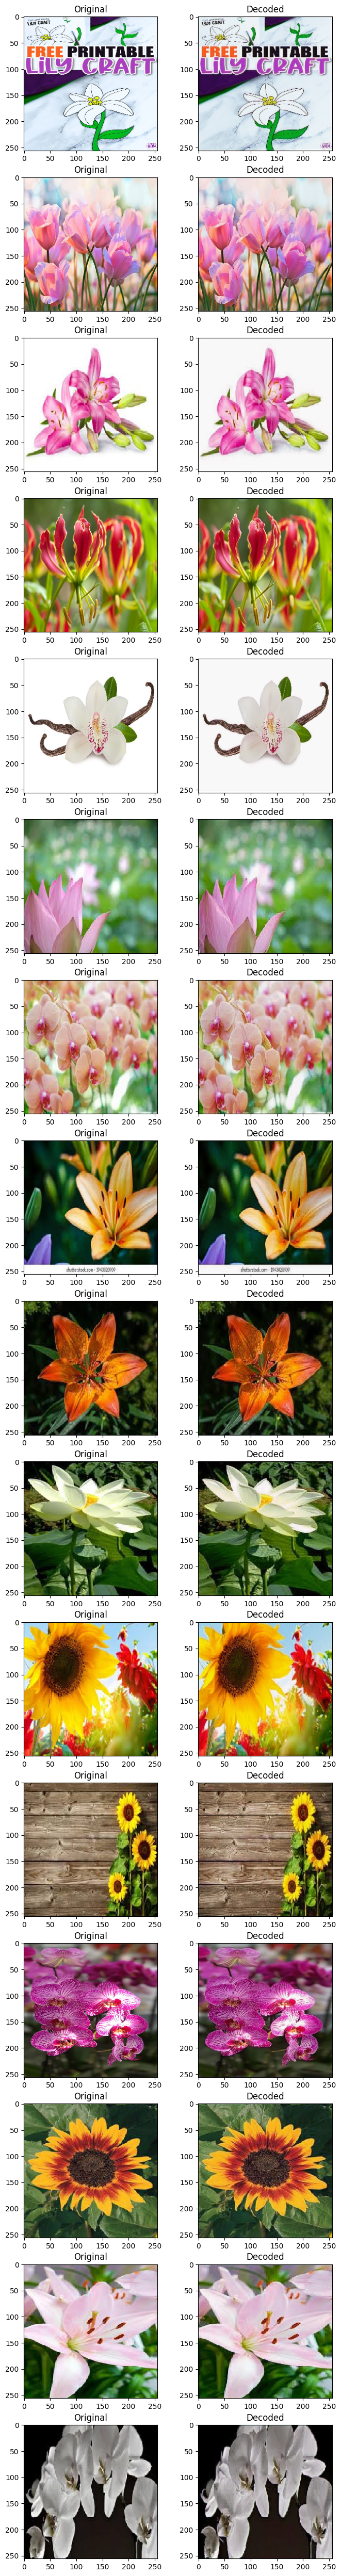

In [39]:
num_images = len(files)
fig, axes = plt.subplots(num_images, 2, figsize=(8, 4*num_images))

for i, image_path in enumerate(files):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = np.vstack([x])
    x = x / 255
    encoded = autoencoder.encoder(x).numpy()
    decoded = autoencoder.decoder(encoded).numpy().reshape(-1, 256, 256, 3)

    axes[i, 0].imshow(x[0])
    axes[i, 0].set_title('Original')

    axes[i, 1].imshow(decoded[0])
    axes[i, 1].set_title('Decoded')

plt.show()

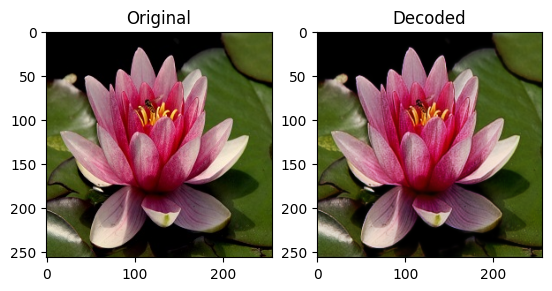

In [40]:
img = tf.keras.preprocessing.image.load_img('/content/lotus.jpg',
                                            target_size=(256, 256))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = np.vstack([x])
x = x / 255

encoded = autoencoder.encoder(x).numpy()
decoded = autoencoder.decoder(encoded).numpy().reshape(-1, 256, 256, 3)

plt.subplot(1, 2, 1)
plt.imshow(x[0])
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(decoded[0])
plt.title('Decoded')

plt.show()

img = tf.keras.preprocessing.image.array_to_img(decoded[0])
img.save('decoded_image_1.jpg')

In [ ]:
tf.keras.backend.clear_session()
class AutoEncoder(tf.keras.models.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = tf.keras.Sequential([
        ])

        self.decoder = tf.keras.Sequential([
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AutoEncoder()